<a href="https://colab.research.google.com/github/tr-h3x/usCensusData/blob/main/censusData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
url = 'https://api.census.gov/data/timeseries/idb/1year?get=NAME,AGE,POP,AREA_KM2&GENC=US&YR=2021&SEX=0'

In [4]:
re = requests.get(url).content
re = json.loads(re)


[['NAME', 'AGE', 'POP', 'AREA_KM2', 'GENC', 'YR', 'SEX'], ['United States', '0', '4127525', '9150541', 'US', '2021', '0'], ['United States', '1', '4127842', '9150541', 'US', '2021', '0'], ['United States', '2', '4124416', '9150541', 'US', '2021', '0'], ['United States', '3', '4116205', '9150541', 'US', '2021', '0'], ['United States', '4', '4105035', '9150541', 'US', '2021', '0'], ['United States', '5', '4026556', '9150541', 'US', '2021', '0'], ['United States', '6', '4049172', '9150541', 'US', '2021', '0'], ['United States', '7', '4044099', '9150541', 'US', '2021', '0'], ['United States', '8', '4033860', '9150541', 'US', '2021', '0'], ['United States', '9', '4040982', '9150541', 'US', '2021', '0'], ['United States', '10', '4087777', '9150541', 'US', '2021', '0'], ['United States', '11', '4086372', '9150541', 'US', '2021', '0'], ['United States', '12', '4087676', '9150541', 'US', '2021', '0'], ['United States', '13', '4216581', '9150541', 'US', '2021', '0'], ['United States', '14', '423

In [8]:
df1 = pd.DataFrame(re, columns=re[0])
#drop row of redundant column title
df2 = df1.drop(index=[0])
df2

,NAME,AGE,POP,AREA_KM2,GENC,YR,SEX
1,United States,0,4127525,9150541,US,2021,0
2,United States,1,4127842,9150541,US,2021,0
3,United States,2,4124416,9150541,US,2021,0
4,United States,3,4116205,9150541,US,2021,0
5,United States,4,4105035,9150541,US,2021,0
...,...,...,...,...,...,...,...
97,United States,96,168612,9150541,US,2021,0
98,United States,97,126502,9150541,US,2021,0
99,United States,98,91564,9150541,US,2021,0
100,United States,99,65221,9150541,US,2021,0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 1 to 101
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NAME      101 non-null    object
 1   AGE       101 non-null    object
 2   POP       101 non-null    object
 3   AREA_KM2  101 non-null    object
 4   GENC      101 non-null    object
 5   YR        101 non-null    object
 6   SEX       101 non-null    object
dtypes: object(7)
memory usage: 5.7+ KB


In [10]:
#change dtype from object to int for AGE with func
def year(x):
  return 2021 - int(x)
df3 = pd.DataFrame(columns=['Year', 'Population'])
df3['Year'] = df2['AGE'].apply(year)
#Change POP object to Population int w lambda function
df3['Population'] = df2['POP'].apply(lambda x: int(x))
df3

,Year,Population
1,2021,4127525
2,2020,4127842
3,2019,4124416
4,2018,4116205
5,2017,4105035
...,...,...
97,1925,168612
98,1924,126502
99,1923,91564
100,1922,65221


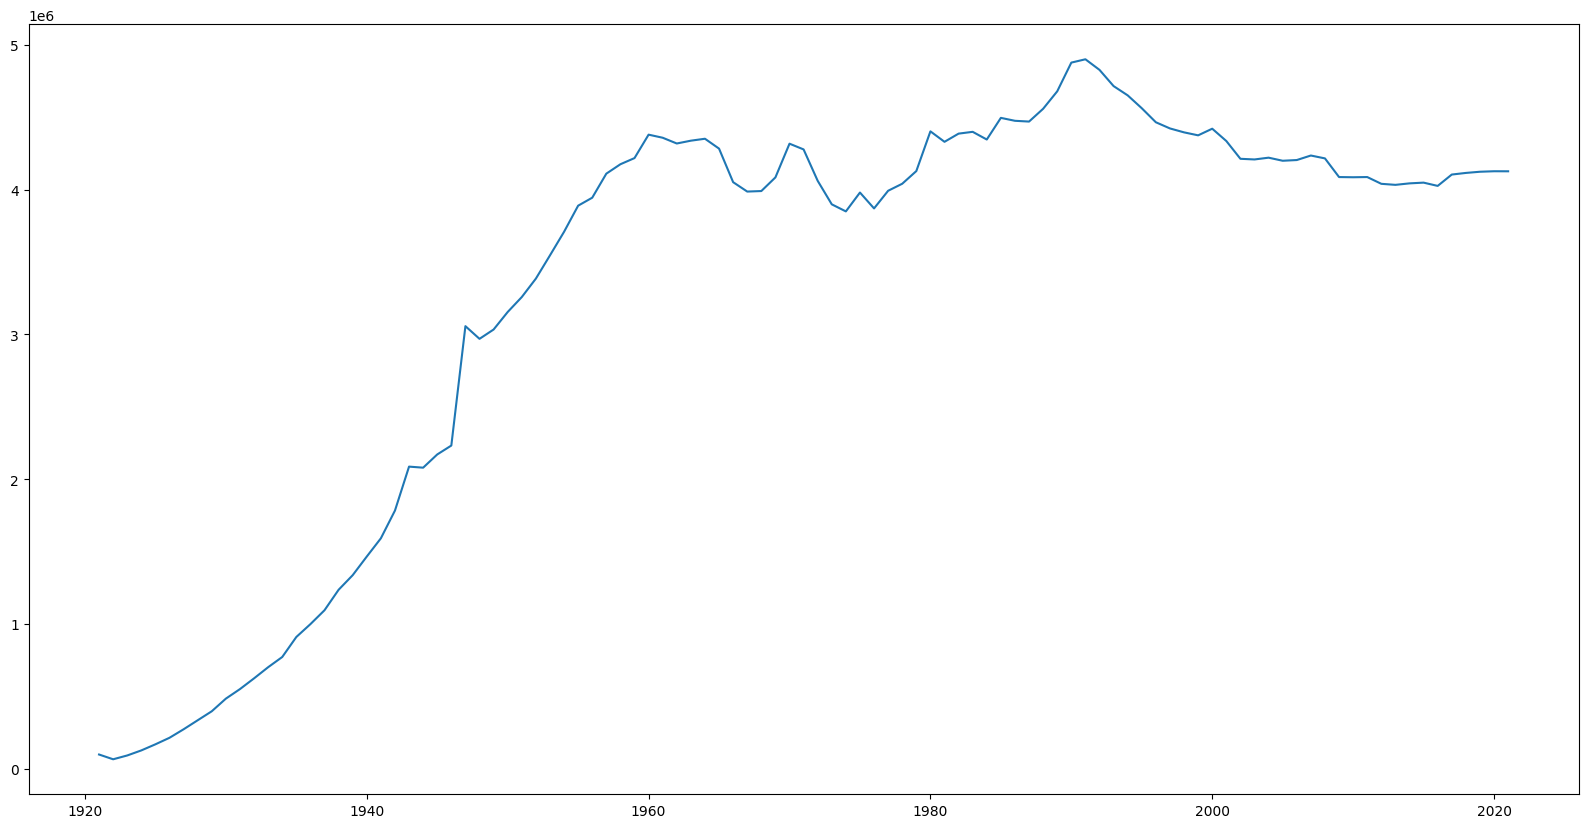

In [11]:
#Plot it
plt.figure(figsize=(20,10))
plt.plot(df3['Year'], df3['Population'])
plt.show()

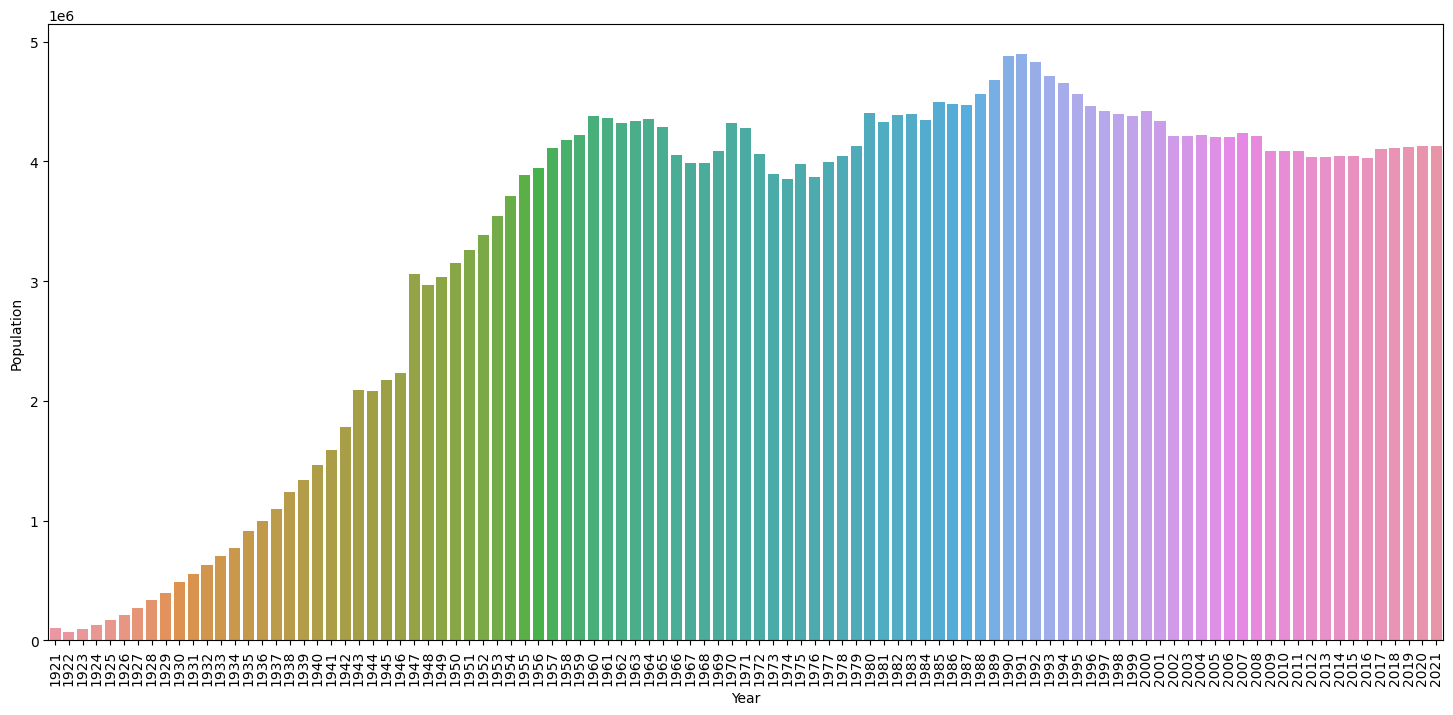

In [20]:
plt.figure(figsize=(18,8))
#fix x,y vars. Barplot expects x,y values.
sns.barplot(x = df3['Year'], y = df3['Population'])
plt.xticks(rotation=90)
plt.show()